In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [3]:

df = pd.read_csv("CHD.csv")
df.head()

,Obs,ID,AGE,agrp,CHD
0,1,1,20,1,0
1,2,2,23,1,0
2,3,3,24,1,0
3,4,4,25,1,0
4,5,5,25,1,1


In [5]:

print(df.info())
print(df['CHD'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Obs     100 non-null    int64
 1   ID      100 non-null    int64
 2   AGE     100 non-null    int64
 3   agrp    100 non-null    int64
 4   CHD     100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB
None
CHD
0    57
1    43
Name: count, dtype: int64


In [7]:
X = df[['AGE']]   # independent variable(s)
y = df['CHD']     # dependent variable


In [9]:
X = sm.add_constant(X)


In [11]:
logit_model = sm.Logit(y, X)
result = logit_model.fit()


Optimization terminated successfully.
         Current function value: 0.536765
         Iterations 6


In [13]:
print(result.summary())


                           Logit Regression Results                           
Dep. Variable:                    CHD   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sun, 14 Dec 2025   Pseudo R-squ.:                  0.2145
Time:                        17:49:13   Log-Likelihood:                -53.677
converged:                       True   LL-Null:                       -68.331
Covariance Type:            nonrobust   LLR p-value:                 6.168e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3095      1.134     -4.683      0.000      -7.531      -3.088
AGE            0.1109      0.024      4.610      0.000       0.064       0.158


In [15]:
df['pred_prob'] = result.predict(X)
print(df[['AGE', 'CHD', 'pred_prob']].head())


   AGE  CHD  pred_prob
0   20    0   0.043479
1   23    0   0.059621
2   24    0   0.066153
3   25    0   0.073344
4   25    1   0.073344


In [17]:
df['pred_class'] = (df['pred_prob'] >= 0.5).astype(int)
print(df[['AGE', 'CHD', 'pred_class']].head())


   AGE  CHD  pred_class
0   20    0           0
1   23    0           0
2   24    0           0
3   25    0           0
4   25    1           0


In [19]:
model = smf.logit("CHD ~ AGE + agrp", data=df).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.536583
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    CHD   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sun, 14 Dec 2025   Pseudo R-squ.:                  0.2147
Time:                        17:50:33   Log-Likelihood:                -53.658
converged:                       True   LL-Null:                       -68.331
Covariance Type:            nonrobust   LLR p-value:                 4.241e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.9311      3.470     -1.709      0.087     -12.733       0.870
AGE            0.1399      0.

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Create a range of ages for smooth curve
age_range = np.linspace(df['AGE'].min(), df['AGE'].max(), 200)

In [23]:
# Add constant term for prediction
age_range_const = sm.add_constant(age_range)

In [25]:
# Predict probabilities using fitted model
pred_probs = result.predict(age_range_const)

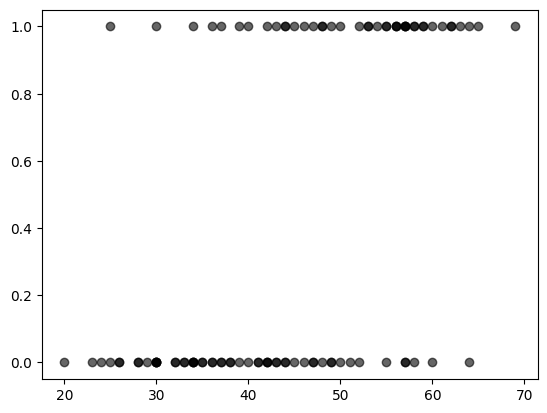

In [27]:
# Plot actual data points
plt.scatter(df['AGE'], df['CHD'], color='black', alpha=0.6, label='Observed data')

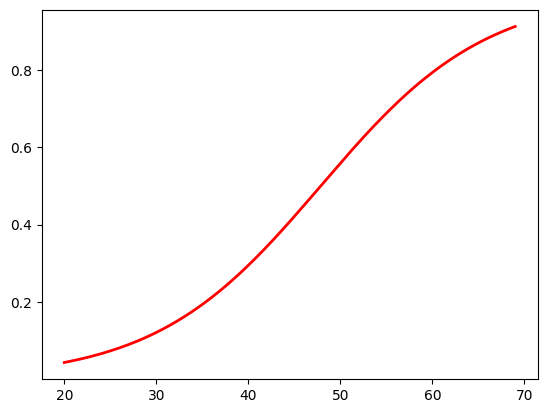

In [29]:
# Plot logistic regression curve
plt.plot(age_range, pred_probs, color='red', linewidth=2, label='Logistic regression curve')